# Settings

In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.5) 

# warning 출력 ignore
warnings.filterwarnings(action='ignore')

# 그래프에서 '-' 기호 때문에 문제 발생하는것 방지
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 적용
font_path = 'C:/jupyter_home/font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [112]:
import re    # 정규식
import itertools

In [113]:
pd.set_option('display.max_rows', None)

# import

In [114]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [115]:
df_train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [116]:
df_test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [117]:
df_train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')

In [185]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   object        
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
 12  date            1205 non-null   datetime64[ns]
 13  year            1205 non-null   int64         
 14  month           1205 non-null   int64         
dtypes: d

In [186]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [118]:
df_train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [119]:
df_test.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2956.840000,129.520000,209.220000,380.140000,298.140000
std,24.968846,84.065873,39.454593,346.564304,52.058056
min,2924.000000,50.000000,131.000000,0.000000,179.000000
25%,2924.000000,78.250000,176.500000,1.000000,257.250000
50%,2974.000000,95.000000,202.500000,465.500000,300.000000
75%,2975.000000,137.500000,245.250000,681.000000,333.250000
max,2983.000000,489.000000,279.000000,1003.000000,413.000000


In [120]:
df_train[df_train['석식계'] == 0 ]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


- 휴일은 제외한 나머지 요일의 중식, 석식 수요자를 나타내었다.

<시도해 볼 수 있는것>
- 석식계, 중식계 최대 최소 boxplot 보기
- 요일별 석식계, 중식계 최대 최소 boxplot 보기
- 요일별 ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']
- 주별 ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']


<null 없애야하는것>
- 석식메뉴가 없는날 (쉬는날이거나 일찍끝나는날이려나?) 석식계가 없는날이 있음
    - 확인해보니까 석식메뉴가 있는날인데도 석식계가 없는날이 있음
    - 중식계가 0인 날은 없음
    - 석식메뉴가 없는날을 추출해 보니까 거의 수요일임 : 매주 마지막주 수요일은 자기계발의 날인것같음

<단어추출 필요할까요 ㅠㅠ?>
- 어떤 음식이 메뉴에 나오는지에 따라서도 중식계, 석식계 차이가 날수 있음
- 중식계, 석식계가 많은날, 적은날 단어 추출하여 어떤게 많은지 찾아보기?

<추가 아이디어>
- ~~휴일에는 중식, 석식을 제공하지 않는다는 전제하에!! 요일이 비어있는날을 휴일이라고 생각하고 휴일이랑 맞닿아있는 날들을 추출하기~~
  - ~~예시 : 4일연휴일때? 등 (휴가자수로 알수있으려나)~~
  - 휴일이 있는주, 없는주로 하려고 했는데... 휴일이 있으면 있어서 연차내고, 없으면 없어서 연차낼것같아서 섣불리 안하는게 좋을것같음
 
  

# EDA

### 01) Normal

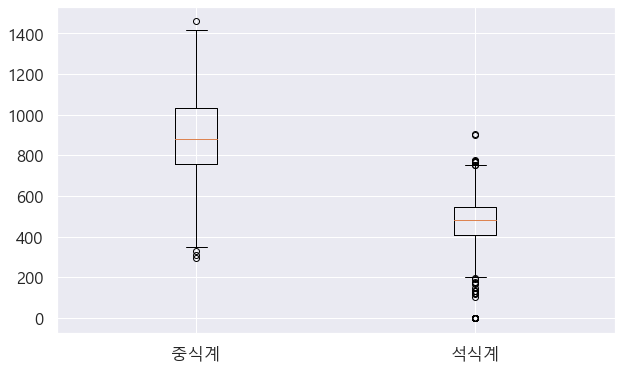

In [121]:
# 중식계, 석식계

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)
ax.boxplot(df_train[['중식계', '석식계']],
           labels = ['중식계', '석식계'])
plt.show()

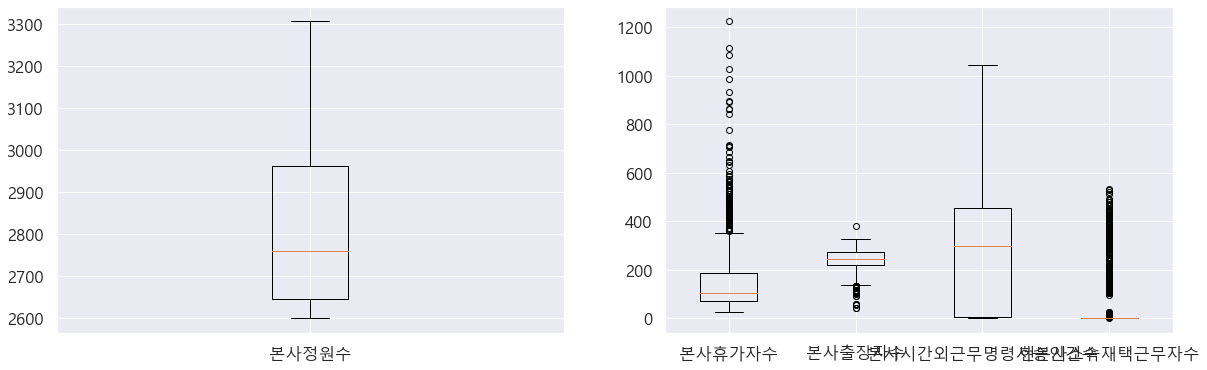

In [122]:
# ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(df_train['본사정원수'],
             labels = ['본사정원수'])
ax2.boxplot(df_train[['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']],
            labels = ['본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수'])
plt.show()

- 본사 휴가자수는 평소 많이 없어서 평균이 낮지만, 휴가자수가 많은날에는 몰리는것으로 예측
- 본사 출장자수는 평균이 생각보다 높았으며, 균일하다고 볼 수 있을 것 같다.
- 재택근무자수는 평균0명 이라서 이상치가 많이 나오는것 같다.

In [123]:
df_train.groupby('요일', as_index=False)[['중식계', '석식계']].mean()

,요일,중식계,석식계
0,금,653.609959,404.979253
1,목,823.991803,480.401639
2,수,905.213389,363.615063
3,월,1144.331950,538.933610
4,화,925.620833,520.129167


<AxesSubplot:xlabel='요일', ylabel='석식계'>

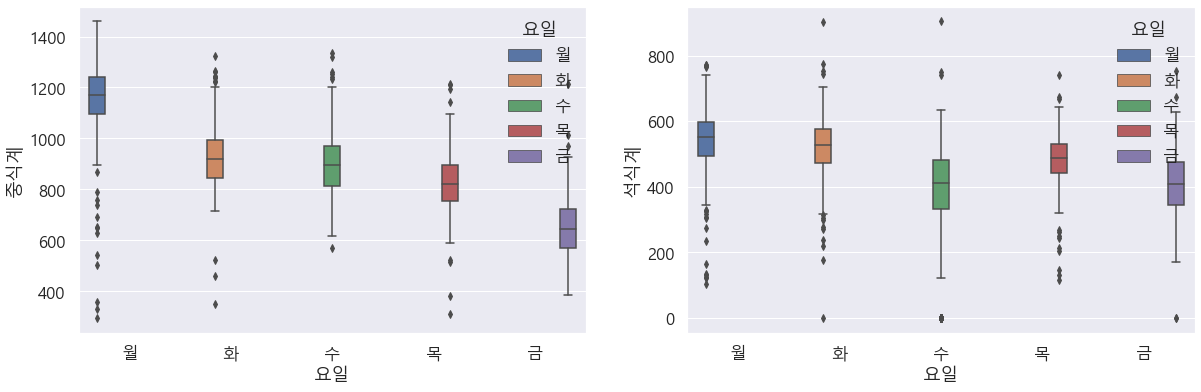

In [124]:
# 요일별 중식계, 석식계

fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot('요일','중식계', hue='요일', data=df_train, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
sns.boxplot('요일','석식계', hue='요일', data=df_train, ax=ax2)

<요일별 중식계, 석식계 평균>
- 중식계는 월요일이 1144로 제일 높았고, 금요일이 653으로 제일 낮았다.
- 석식계는 월요일이 538로 제일 높았고, 수요일이 363으로 제일 낮았으며, 금요일은 404로 두번째로 낮았다.

In [125]:
df_train.groupby('요일', as_index=False)[['본사정원수','본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수','현본사소속재택근무자수']].mean()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,금,2807.817427,245.078838,273.680498,38.995851,37.278008
1,목,2805.815574,137.372951,255.577869,379.545082,42.389344
2,수,2805.690377,113.092050,241.405858,8.209205,45.652720
3,월,2812.049793,174.742739,204.190871,483.767635,45.518672
4,화,2807.712500,119.004167,230.637500,457.308333,46.737500


#### histogram

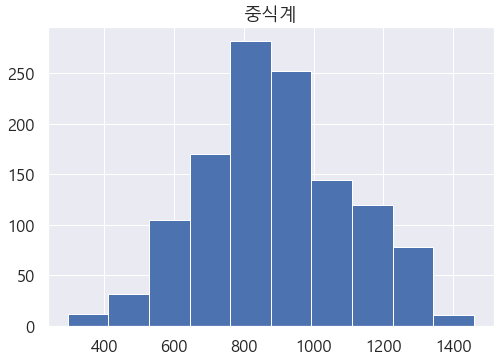

In [126]:
plt.hist(df_train['중식계'])
plt.title('중식계')
plt.show()

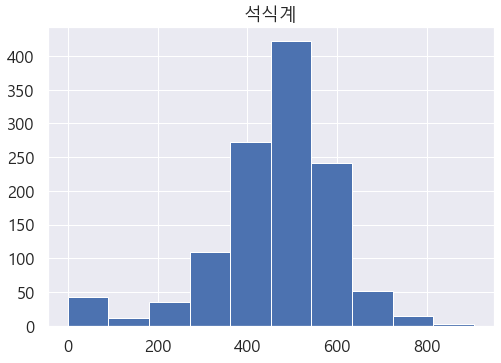

In [127]:
plt.hist(df_train['석식계'])
plt.title('석식계')
plt.show()

<요일별 근무자수 평균>
- 본사정원수는 요일별 비슷했다.
- 본사휴가자수는 금요일과 월요일이 많았다.
- 본사출장자수는 금요일에 많았다.
- 본사시간외근무명령서 승인건수는 수요일 금요일이 적었다.
- 재택근무자수는 요일별 비슷했다.

### 02) 마지막주 수요일 확인하기

- 석식계가 0인 날은 자기계발의 날이 있는것 같다. 이를 확인해본다.

In [128]:
df_train.mean()

본사정원수             2807.815768
본사휴가자수             157.913693
본사출장자수             241.142739
본사시간외근무명령서승인건수     274.117012
현본사소속재택근무자수         43.506224
중식계                890.334440
석식계                461.772614
dtype: float64

In [129]:
df_train[df_train['석식계']==0].mean()

본사정원수             2793.325581
본사휴가자수             133.813953
본사출장자수             253.162791
본사시간외근무명령서승인건수       2.465116
현본사소속재택근무자수          9.000000
중식계                859.581395
석식계                  0.000000
dtype: float64

- 평균은 근무명령서 승인건수, 재택근무자수, 석식계 말고 큰차이가 없음

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [131]:
# datetime으로 날짜 만들어주기
df_train['date']=pd.to_datetime(df_train['일자'])
df_train['year']=df_train['date'].apply(lambda x: x.year)
df_train['month']=df_train['date'].apply(lambda x : x.month)
df_train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,date,year,month
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016-02-01,2016,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016-02-02,2016,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016-02-03,2016,2
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016-02-04,2016,2
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016-02-05,2016,2


In [132]:
# 요일 개수 확인, 별다른 이상 없는것같음
df_train['요일'].value_counts()

목    244
월    241
금    241
화    240
수    239
Name: 요일, dtype: int64

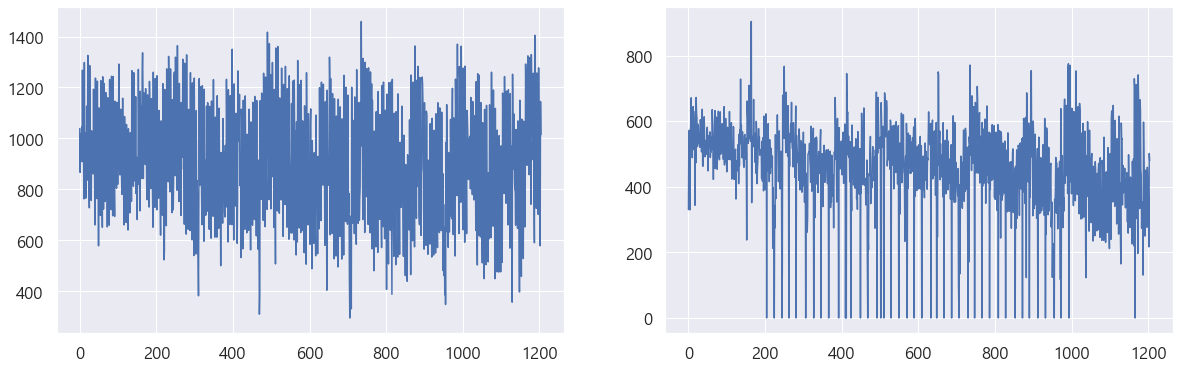

In [133]:
# 전체적인 plot 확인하기 
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(df_train['중식계'])
ax2.plot(df_train['석식계'])

In [134]:
print(df_train['date'].max())
print(df_train['date'].min())
df_train['date'].max() - df_train['date'].min()

2021-01-26 00:00:00
2016-02-01 00:00:00


Timedelta('1821 days 00:00:00')

In [135]:
1821/7

260.14285714285717

- 요일수가 고르다고 생각했는데, 전체일수가 1821 인것에 비해 260씩이아닌, 240개씩이다.
- 휴일이 고르게 분포가 되어있었던것같다

In [136]:
# 마지막주 수요일 보기 실패

### 메뉴분리

나눠서 가장많은것, 가장적은것(other로 묶기) 이렇게 진행해보기

In [137]:
# 모두 분리
all_menu = [x.split(' ') for x in df_train['석식메뉴'].values]

In [138]:
len(all_menu)

1205

In [139]:
# itertools chain으로 다 묶어줌
import itertools
menu = list(set(list(itertools.chain(*all_menu))))

In [140]:
len(menu)

1767

In [141]:
# 괄호와 괄호 내용 삭제
regex = "\(.*\)|\s-\s.*" 

for i in range(len(menu)):
    menu[i] = re.sub(regex, '', menu[i])
    
menu = list(set(menu))

In [142]:
len(menu)

1684

In [143]:
# * 포함된 메뉴 출력
for m in menu:
    if '&'in m:
        print(m)

양배추샐러드&사우전D
골뱅이채소무침&실곤약
해물까스&타르타르D
수제돈가스&소스
골뱅이무침&소면
부대찌개&쫄면사리
햄전&케찹
몽골식돈육볶음&꽃빵
해물까스&타르타르소스
핫도그&케찹
잡채밥&짜장소스
고추잡채&꽃빵
오징어&브로컬리숙회
나가사키면&김
볶음밥&짜장소스
컵라면&찐계란
채소볶음밥&자장소스
김말이&만두튀김


<*종류>
- 그냥 있는거
- *00소스
- *장
- *소스
- *드레싱
- *케찹
- *00S
- *00D
- *소금
- *타르타르


In [144]:
'''
*, & 없애는 정규식만들기  

"[*].*소스"
"[*].*장"
"[*].*드레싱"
"[*]케찹"
"[*]소금"
"[*]연유"
"[*].*S"
"[*].*D"
"[*]"

'[&].*소스'
'[&]케찹'
'[&].*D'
'[&].*'

'''

'\n*, & 없애는 정규식만들기  \n\n"[*].*소스"\n"[*].*장"\n"[*].*드레싱"\n"[*]케찹"\n"[*]소금"\n"[*]연유"\n"[*].*S"\n"[*].*D"\n"[*]"\n\n\'[&].*소스\'\n\'[&]케찹\'\n\'[&].*D\'\n\'[&].*\'\n\n'

In [145]:
# 괄호와 괄호 내용 삭제
regex_list = ["[*].*소스","[*].*장","[*].*드레싱","[*]케찹","[*]소금","[*]연유","[*].*S",
              "[*].*D","[*].*",'[&].*소스','[&]케찹','[&].*D']

for i in range(len(menu)):
    for regex in regex_list:
        menu[i] = re.sub(regex, '', menu[i])
    
menu = list(set(menu))
menu.remove('')
menu

['키위그린샐러드',
 '가정의날',
 '메밀국수',
 '카레덮밥',
 '또띠아칩/오렌지',
 '참나물무침',
 '물파래전',
 '미더덕콩나물찜',
 '해물된장찌개',
 '비트무피클',
 '오므라이스',
 '무우짱아찌',
 '요플레/단무지',
 '돈까스또띠아',
 '미트볼조림',
 '꼬치어묵매운탕',
 '치킨텐더',
 '얼큰동태탕',
 '아삭고추된장무침',
 '흑미밥',
 '모둠튀김',
 '오렌지주스',
 '초계국수',
 '삼치구이',
 '만두국',
 '훈제오리불고기',
 '연두부',
 '브로컬리초장',
 '짬뽕국',
 '고구마순볶음',
 '치커리유자청무침',
 '돌나물오이무침',
 '매운순대국밥',
 '찹쌀밥',
 '파닭',
 '호박나물',
 '열대과일샐러드',
 '시금치나물',
 '브로콜리',
 '등갈비오븐구이',
 '소고기콜라비조림',
 '바게뜨',
 '오이보트샐러드',
 '열무김치',
 '감자채전',
 '아이스슈',
 '가자미카레튀김',
 '녹두빈대떡',
 '미니돈까스',
 '소세지볶음',
 '고구마샐러드',
 '닭곰탕',
 '통마늘너비아니조림',
 '미니햄버거',
 '수제피클/오렌지',
 '건새우아욱국',
 '무채국',
 '김자반/치킨무',
 '참치김치찌개',
 '포기김치/마늘바게트',
 '통새우또띠아',
 '훈제오리구이',
 '청국장찌개',
 '황태무채국',
 '꽁치한마리구이',
 '청경채나물',
 '베이컨숙주볶음',
 '해물가스',
 '옛날왕돈가스',
 '과일',
 '골뱅이채소무침&실곤약',
 '돼지갈비찜',
 '핫도그',
 '갈치조림',
 '표고버섯탕수육',
 '시금치나물무침',
 '깻잎양념찜',
 '돈육고구마강정',
 '소고기장조림',
 '간장치킨',
 '청포도피클',
 '우삼겹부대찌개',
 '크림새우',
 '목살필라프',
 '오징어무국',
 '참나물들깨무침',
 '꼬지어묵국',
 '짜장면/작은밥',
 '무말랭이무침',
 '쇠고기미역국',
 '고기전',
 '깻잎쌈',
 '꽃맛살볶음',
 '간장깻잎지',
 '쑥갓나물',
 '계란파국',
 '햄감자

In [146]:
len(menu)

1622

In [147]:
df_menu = pd.DataFrame({'menu':menu})
df_menu

,menu
0,키위그린샐러드
1,가정의날
2,메밀국수
3,카레덮밥
4,또띠아칩/오렌지
5,참나물무침
6,물파래전
7,미더덕콩나물찜
8,해물된장찌개
9,비트무피클


In [148]:
df_menu = df_menu[~df_menu['menu'].str.contains(':', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\)', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\>', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\(', na=False, case=False)]
df_menu.reset_index(drop=True, inplace = True)

In [149]:
menu_clist = []
for index, m in df_menu.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)
#     print(df_train['석식메뉴'].str.contains(m.menu).sum())
#     count = df_train['석식메뉴'].str.contains(m.menu).sum()
#     print(index, m.menu, count)
#     df_menu.iloc[index,:]['count'] = count
#     print(df_menu.iloc[index,:]['count'])

df_menu['count'] = pd.DataFrame({'count' : menu_clist})
df_menu.head()

,menu,count
0,키위그린샐러드,1
1,가정의날,1
2,메밀국수,4
3,카레덮밥,3
4,또띠아칩/오렌지,1


<AxesSubplot:>

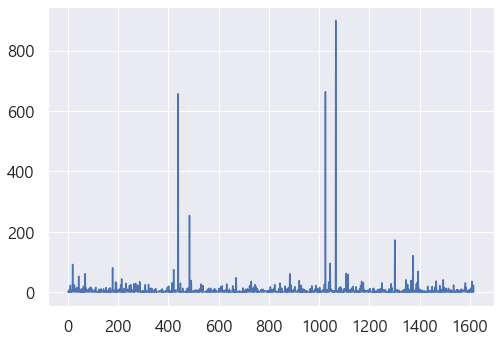

In [150]:
df_menu['count'].plot()

In [151]:
df_menu2 = df_menu.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)
# df_menu2.head(50)

In [152]:
## 너무중복되는게 많아서 이전에 있었던거에 포함되면 삭제하는 방법을 생각해보았다.
# df_menu2 : 기호 등 삭제할거 다 삭제된 메뉴들

df_temp = df_menu2.copy()
for index, m in df_temp.iterrows():
#     print(m.menu)
    for index2, ori_m in df_temp.iloc[:index].iterrows():
#         print(re_m.menu)
        if ori_m['menu'] in m.menu :
            print(index)
            df_menu2.drop(index, inplace=True)
            break

2
30
32
34
36
38
41
49
57
66
71
77
79
82
85
95
98
111
125
126
129
131
133
136
138
139
147
148
152
153
155
158
163
165
166
170
174
183
192
194
202
203
204
205
206
207
217
221
224
225
230
231
233
235
239
241
242
243
244
245
254
255
260
261
270
271
278
280
284
285
286
289
294
297
298
300
302
303
304
309
310
312
316
321
322
324
327
329
330
332
337
340
342
346
348
355
357
362
364
366
369
376
377
378
380
381
386
387
390
391
393
395
403
404
406
414
416
417
422
425
429
433
435
437
439
441
443
444
446
449
450
451
454
459
462
463
465
466
468
469
470
476
477
482
489
490
499
502
503
511
514
516
519
520
527
532
533
534
535
536
540
541
543
545
546
550
551
552
554
560
564
566
568
569
572
575
577
578
579
583
584
586
587
588
591
592
593
594
597
598
599
603
604
606
608
610
611
613
614
615
616
617
618
619
622
628
630
631
637
638
645
646
649
651
652
657
658
660
661
662
663
664
665
668
676
677
678
680
681
683
685
688
690
691
693
695
696
701
703
705
707
710
711
713
717
718
722
726
727
728
729
730
733
735
74

In [153]:
len(df_menu2)

892

In [154]:
df_menu2

,menu,count
0,포기김치,900
1,쌀밥,664
3,샐러드,254
4,장국,173
5,볶음밥,121
6,단무지,96
7,흑미밥,92
8,깍두기,81
9,우동,75
10,김밥,69


In [155]:
menu_clist = []
for index, m in df_menu2.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)

df_menu2['count'] = pd.DataFrame({'count' : menu_clist})
df_menu2.head()

,menu,count
0,포기김치,900.0
1,쌀밥,664.0
3,샐러드,173.0
4,장국,121.0
5,볶음밥,96.0


In [156]:
# 1600개에서 892개로 거의 반이 줄었지만, 근본적인 문제는 ....
# 단어 list를 만들어보려한다.
요리 = ['불고기', '카레', '튀김', '까스' ,'파스타', '스파게티']
재료 = ['닭', '오징어','돈육','새우']
# 불고기에 오징어가 들어가면 오징어 불고기 이런식으로 카운트가 안됌
# 닭도 여러가지 종류의 음식이 있어서 카운트가 안됌
# ★파스타, 스파게티 묶어주기
# ★떡볶음, 떡볶이........ 안묶어줘
요리+재료

['불고기', '카레', '튀김', '까스', '파스타', '스파게티', '닭', '오징어', '돈육', '새우']

In [157]:
# # test
# text = '고구마'
# print(df_train['석식메뉴'].str.contains(text).sum())
# print(df_menu2['menu'].str.contains(text).sum())
# display(df_menu2[df_menu2['menu'].str.contains(text)])

In [158]:
df_menu3 = df_menu2.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)
# df_menu2.head(50)

In [159]:
new_mlist = ['불고기', '카레', '튀김', '까스', '파스타', '스파게티', '닭', '오징어', '돈육', '새우']
add_menu = pd.DataFrame({'menu': new_mlist,
                         'count': [0 for _ in range(len(new_mlist))]})
df_menu3 = pd.concat([df_menu3, add_menu])
df_menu3.reset_index(drop=True, inplace = True)

In [160]:
menu_clist = []
for index, m in df_menu3.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)

df_menu3['count'] = pd.DataFrame({'count' : menu_clist})
df_menu3 = df_menu3.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)

In [161]:
## 너무중복되는게 많아서 이전에 있었던거에 포함되면 삭제하는 방법을 생각해보았다.
# df_menu2 : 기호 등 삭제할거 다 삭제된 메뉴들

df_temp = df_menu3.copy()
for index, m in df_temp.iterrows():
#     print(m.menu)
    for index2, ori_m in df_temp.iloc[:index].iterrows():
#         print(re_m.menu)
        if ori_m['menu'] in m.menu :
            df_menu3.drop(index, inplace=True)
            break

In [162]:
len(df_menu3)

782

In [163]:
mlist = df_menu3[:36]

In [164]:
# 몇개정도 해야하려나

### 03) 휴일 수 세기

In [165]:
df_train.groupby(['year','month'], as_index=False)['date'].count()

,year,month,date
0,2016,2,18
1,2016,3,22
2,2016,4,20
3,2016,5,20
4,2016,6,21
5,2016,7,21
6,2016,8,22
7,2016,9,19
8,2016,10,20
9,2016,11,22


- 일자가 빈게 많다~! 어떻게하지!!!
- 보통 4주이면 20개는 있어야 한다~!
- 시간없으니까 안하는걸로~!

# Pre Preocessing

- ~~마지막주 수요일 True, False 컬럼 넣어주기?~~


- 정규분포로 바꿔주기
- scale 바꿔주기


In [166]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,year,month
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,0.764078,0.244705
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,0.129875,0.193627
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,-0.109583,0.210877
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,0.181749,0.018316
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,0.571133,0.033586
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,-0.078804,-0.154664
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,-0.194792,-0.127142
year,0.764078,0.129875,-0.109583,0.181749,0.571133,-0.078804,-0.194792,1.000000,-0.092612
month,0.244705,0.193627,0.210877,0.018316,0.033586,-0.154664,-0.127142,-0.092612,1.000000


- 중식계는 본사출장자수와 연관
- 둘다 본사휴가자수, 본사시간외근무명령서승인건수와 연관

- 중식계, 석식계 둘다 서로 연관이 있는데, 종속변수끼리 연관성을 가지면 어떻게 해야하나?

In [167]:
df_train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', 'date', 'year',
       'month'],
      dtype='object')

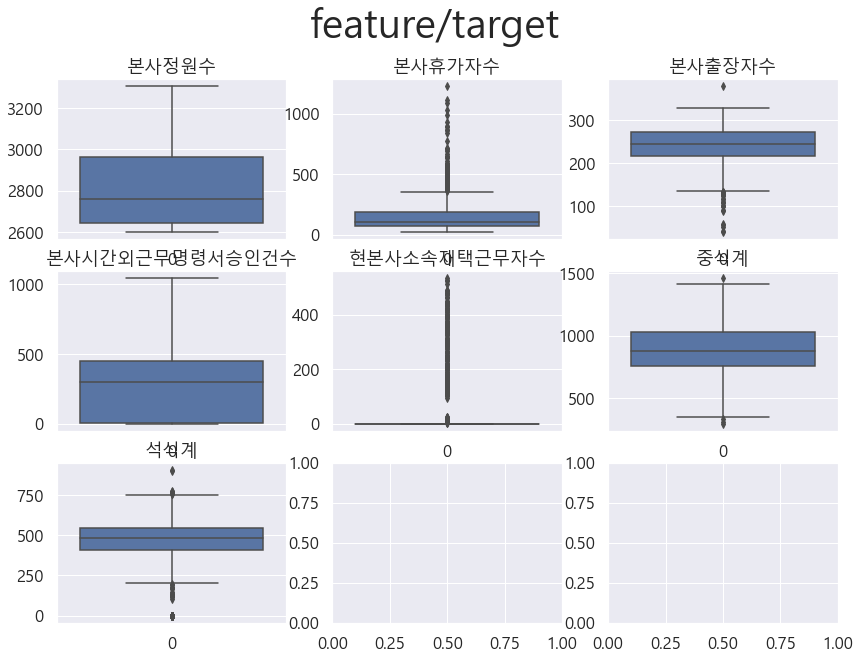

In [168]:
fig, ax = plt.subplots(3, 3, figsize = (14, 10))

plt.suptitle('feature/target', fontsize=40)

feature = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계']

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.boxplot(data = df_train[xstr], ax=ax[yvalue][xvalue])
    ax[yvalue][xvalue].set_title(xstr)
    
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else :
        xvalue += 1

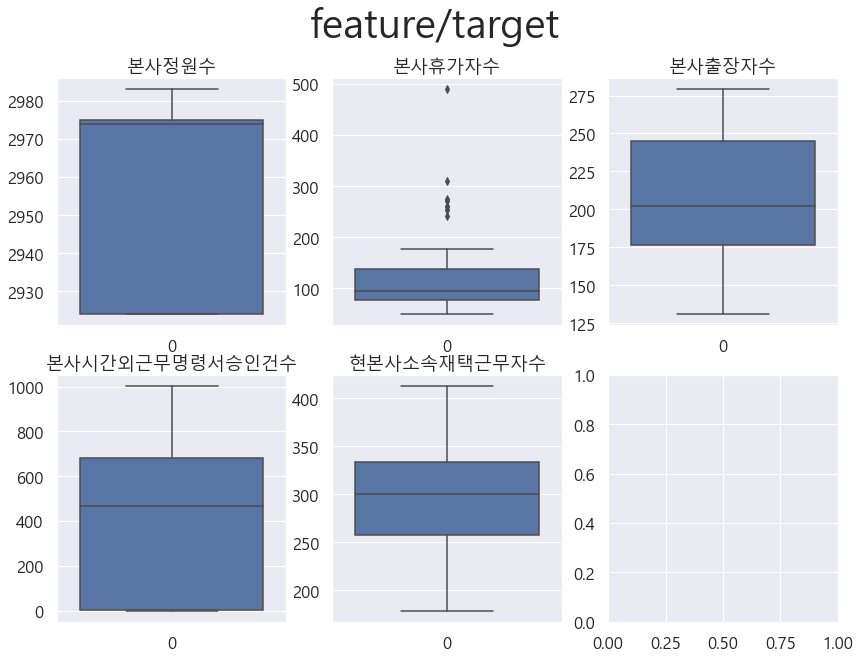

In [169]:
fig, ax = plt.subplots(2, 3, figsize = (14, 10))

plt.suptitle('feature/target', fontsize=40)

feature = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수']

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.boxplot(data = df_test[xstr], ax=ax[yvalue][xvalue])
    ax[yvalue][xvalue].set_title(xstr)
    
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else :
        xvalue += 1

### 정규화

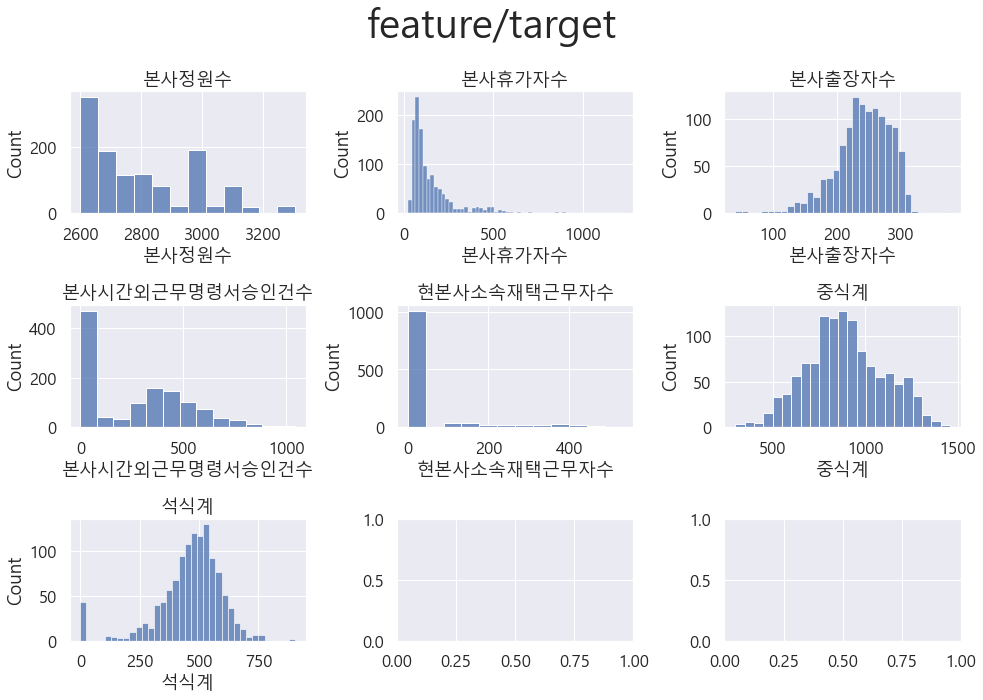

In [170]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

feature = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계']

scaler = MinMaxScaler()
df_train_1 = df_train[feature]
df_train_1 = scaler.fit(df_train_1).transform(df_train_1)
df_train_1 = pd.DataFrame(df_train_1)
df_train_1.columns = [feature]

fig, ax = plt.subplots(3, 3, figsize = (14, 10))

plt.suptitle('feature/target', fontsize=40)

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.histplot(data = df_train[xstr], ax=ax[yvalue][xvalue])
#     sns.histplot(data = df_train_1[xstr], ax=ax[yvalue][xvalue])

    ax[yvalue][xvalue].set_title(xstr)
    
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else :
        xvalue += 1

plt.tight_layout()
plt.show()    

In [171]:
# from scipy import stats
# from sklearn.preprocessing import MinMaxScaler

# feature = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
#        '현본사소속재택근무자수', '중식계', '석식계']

# scaler = MinMaxScaler()
# df_train_1 = df_train[feature]
# df_train_1 = scaler.fit(df_train_1).transform(df_train_1)
# df_train_1 = pd.DataFrame(df_train_1)
# df_train_1.columns = [feature]

# fig, ax = plt.subplots(3, 3, figsize = (14, 10))

# plt.suptitle('feature/target', fontsize=40)

# xvalue = 0
# yvalue = 0

# for xstr in feature:
# #     sns.histplot(data = df_train[xstr], ax=ax[yvalue][xvalue])
#     sns.histplot(data = df_train_1[xstr], ax=ax[yvalue][xvalue])

#     ax[yvalue][xvalue].set_title(xstr)
    
#     if xvalue == 2:
#         xvalue = 0
#         yvalue += 1
#     else :
#         xvalue += 1

# plt.tight_layout()
# plt.show()        

## train log 씌우기

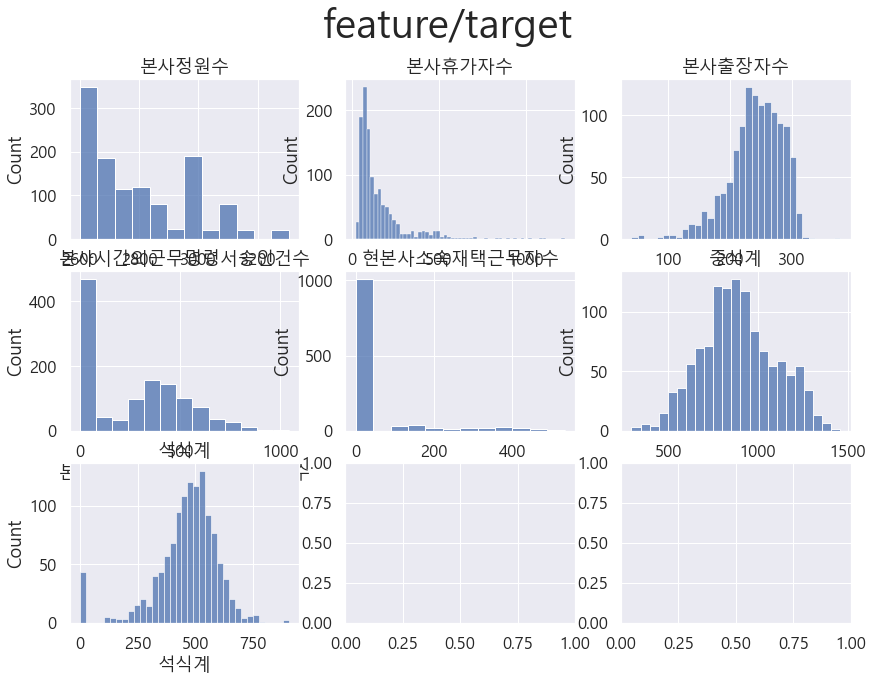

In [172]:
fig, ax = plt.subplots(3, 3, figsize = (14, 10))

plt.suptitle('feature/target', fontsize=40)

feature = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계']

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.histplot(data = df_train[xstr], ax=ax[yvalue][xvalue])
    ax[yvalue][xvalue].set_title(xstr)
    
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else :
        xvalue += 1

### log 적용

- 본사 휴가자수, 본사 출장자수만 해주면 될것같음

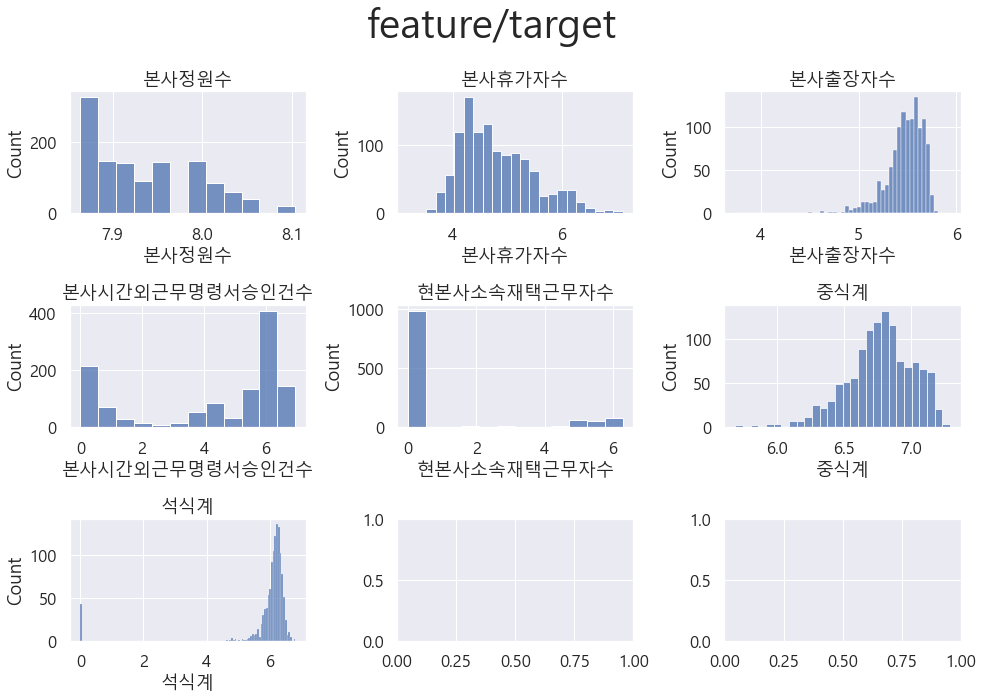

In [173]:
from scipy import stats
fig, ax = plt.subplots(3, 3, figsize = (14, 10))

plt.suptitle('feature/target', fontsize=40)

feature = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계']

xvalue = 0
yvalue = 0

for xstr in feature:
#     sns.histplot(data = df_train[xstr].map(lambda i: np.log(i) if i > 0 else 0), ax=ax[yvalue][xvalue])
    sns.histplot(data = np.log1p(df_train[xstr]), ax=ax[yvalue][xvalue])
#     sns.histplot(data = np.sqrt(df_train[xstr]), ax=ax[yvalue][xvalue])
#     sns.histplot(data = pd.Series(stats.boxcox(df_train[xstr]+0.0001)[0]), ax=ax[yvalue][xvalue])
#     sns.distplot(pd.Series(stats.boxcox(df_train[xstr]+0.0001)[0]), ax=ax[yvalue][xvalue])
    ax[yvalue][xvalue].set_title(xstr)
    
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else :
        xvalue += 1
        
plt.tight_layout()     
plt.show()

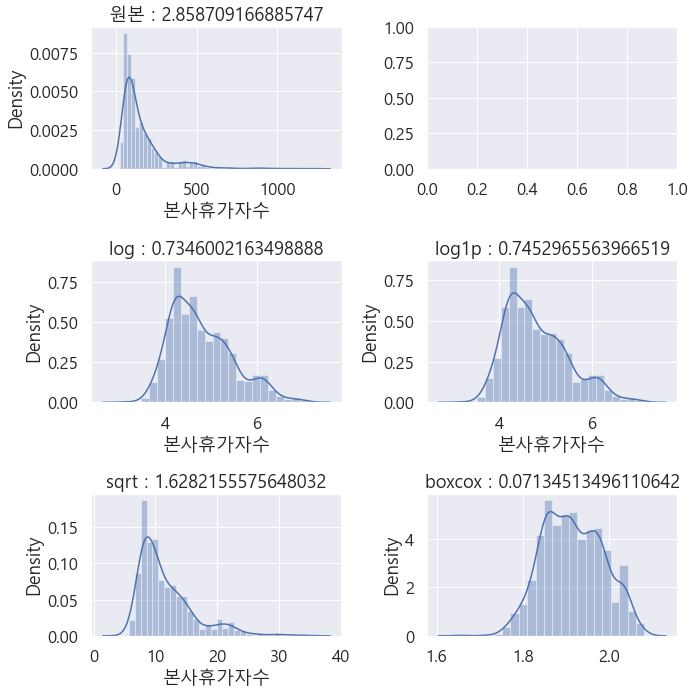

In [174]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

xstr = '본사휴가자수'
# 본사휴가자수 : boxcox 씌우기
# 본사출장자수 : boxcox 씌우기

t_train = df_train[xstr]
txtstr = t_train.skew()
sns.distplot(t_train, ax=ax1)
ax1.set_title('원본 : '+str(txtstr))


t_train = df_train[xstr].map(lambda i: np.log(i) if i > 0 else 0)
txtstr = t_train.skew()
sns.distplot(t_train, ax=ax3)
ax3.set_title('log : ' + str(txtstr))

t_train = np.log1p(df_train[xstr])
txtstr = t_train.skew()
sns.distplot(t_train, ax=ax4)
ax4.set_title('log1p : '+str(txtstr))
              
t_train = np.sqrt(df_train[xstr])
txtstr = t_train.skew()
sns.distplot(t_train, ax=ax5)
ax5.set_title('sqrt : '+str(txtstr))

t_train = pd.Series(stats.boxcox(df_train[xstr]+0.0001)[0])
txtstr = t_train.skew()
sns.distplot(t_train, ax=ax6)
ax6.set_title('boxcox : '+str(txtstr))              
         
plt.tight_layout()     
plt.show()

## Test log 씌우기

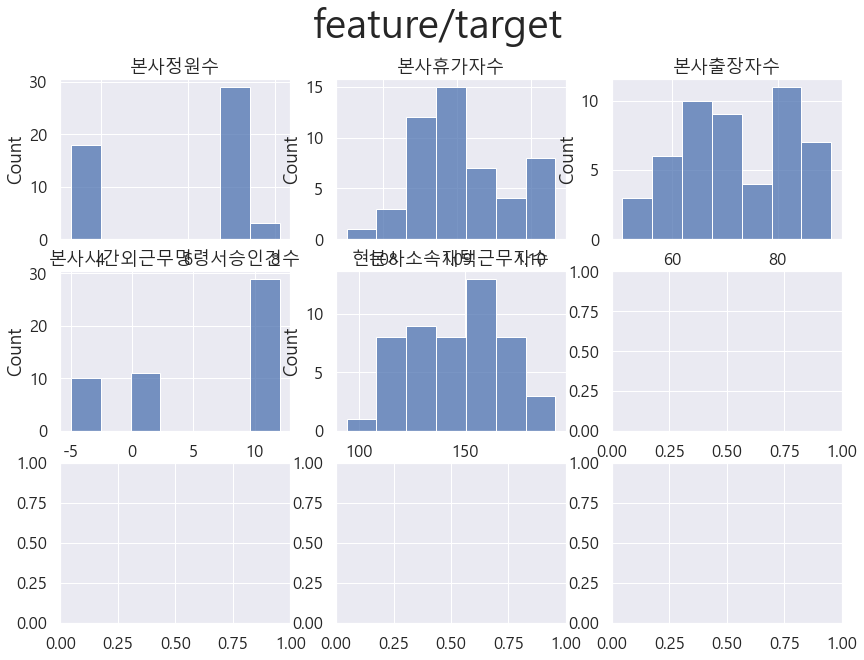

In [175]:
from scipy import stats
fig, ax = plt.subplots(3, 3, figsize = (14, 10))

plt.suptitle('feature/target', fontsize=40)

feature = ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수']

xvalue = 0
yvalue = 0

for xstr in feature:
#     sns.histplot(data = df_test[xstr], ax=ax[yvalue][xvalue])
#     sns.histplot(data = df_test[xstr].map(lambda i: np.log(i) if i > 0 else 0), ax=ax[yvalue][xvalue])
#     sns.histplot(data = np.log1p(df_test[xstr]), ax=ax[yvalue][xvalue])
#     sns.histplot(data = np.sqrt(df_test[xstr]), ax=ax[yvalue][xvalue])
    sns.histplot(data = pd.Series(stats.boxcox(df_test[xstr]+0.0001)[0]), ax=ax[yvalue][xvalue])
    ax[yvalue][xvalue].set_title(xstr)
    
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else :
        xvalue += 1

# 메뉴 정리

In [176]:
# 1차 필터

# 모든메뉴 분리
dinner_menu = [x.split(' ') for x in df_train['석식메뉴'].values]

# itertools chain으로 모든원소 연결하여 중복값제거
menu = list(set(list(itertools.chain(*dinner_menu))))

# 괄호와 괄호 내용 삭제, 중복값 제거
regex = "\(.*\)|\s-\s.*" 

for i in range(len(menu)):
    menu[i] = re.sub(regex, '', menu[i])
    
menu = list(set(menu))

# 기호 삭제
regex_list = ["[*].*소스","[*].*장","[*].*드레싱","[*]케찹","[*]소금","[*]연유","[*].*S",
              "[*].*D","[*].*",'[&].*소스','[&]케찹','[&].*D']

for i in range(len(menu)):
    for regex in regex_list:
        menu[i] = re.sub(regex, '', menu[i])
    
menu = list(set(menu))
menu.remove('')

# 추가로 오류나는 괄호 내용 삭제
df_menu = pd.DataFrame({'menu':menu})

df_menu = df_menu[~df_menu['menu'].str.contains(':', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\)', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\>', na=False, case=False)]
df_menu = df_menu[~df_menu['menu'].str.contains('\(', na=False, case=False)]
df_menu.reset_index(drop=True, inplace = True)

# 메뉴 카운트
menu_clist = []
for index, m in df_menu.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)

df_menu['count'] = pd.DataFrame({'count' : menu_clist})
df_menu.head()

len(menu)

1622

In [177]:
# 2차 필터

df_menu2 = df_menu.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)

# 중복되는 음식들 제거
df_temp = df_menu2.copy()
for index, m in df_temp.iterrows():
    for index2, ori_m in df_temp.iloc[:index].iterrows():
        if ori_m['menu'] in m.menu :
            df_menu2.drop(index, inplace=True)
            break
            
len(df_menu2)

# 메뉴 카운트
menu_clist = []
for index, m in df_menu2.iterrows():
    c = df_train['석식메뉴'].str.contains(m.menu).sum()
    menu_clist.append(c)

df_menu2['count'] = pd.DataFrame({'count' : menu_clist})
len(df_menu2)

892

In [178]:
# # 3차 필터 (필요없는것같아서 안하기)

# df_menu3 = df_menu2.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)

# # 중복되어서 나오는 음식들 묶어주기
# new_mlist = ['불고기', '카레', '튀김', '까스', '파스타', '스파게티', '닭', '오징어', '돈육', '새우']
# add_menu = pd.DataFrame({'menu': new_mlist,
#                          'count': [0 for _ in range(len(new_mlist))]})
# df_menu3 = pd.concat([df_menu3, add_menu])
# df_menu3.reset_index(drop=True, inplace = True)

# # 중복되는 음식 제거
# df_temp = df_menu3.copy()
# for index, m in df_temp.iterrows():
#     for index2, ori_m in df_temp.iloc[:index].iterrows():
#         if ori_m['menu'] in m.menu :
#             df_menu3.drop(index, inplace=True)
#             break
            
# # 메뉴 카운트
# menu_clist = []
# for index, m in df_menu3.iterrows():
#     c = df_train['석식메뉴'].str.contains(m.menu).sum()
#     menu_clist.append(c)

# df_menu3['count'] = pd.DataFrame({'count' : menu_clist})
# df_menu3 = df_menu3.sort_values(by=['count'], axis=0, ascending = False).reset_index(drop=True)

# len(df_menu3)

In [179]:
df_train_2 = df_train.copy()
df_test_2 = df_test.copy()

df_train_2.rename(columns = {'본사휴가자수' : '휴가자수',
                               '본사출장자수' : '출장자수',
                               '본사시간외근무명령서승인건수': '승인건수',
                               '현본사소속재택근무자수': '재택근무'}, inplace = True)
df_test_2.rename(columns = {'본사휴가자수' : '휴가자수',
                               '본사출장자수' : '출장자수',
                               '본사시간외근무명령서승인건수': '승인건수',
                               '현본사소속재택근무자수': '재택근무'}, inplace = True)


In [180]:
df_menu2['menu'][:50].values

array(['포기김치', '쌀밥', '샐러드', '장국', '볶음밥', '단무지', '흑미밥', '깍두기', '우동', '김밥',
       '잡채', '주먹밥', '과일', '음료', '열무김치', '된장찌개', '알타리김치', '떡볶이', '무피클',
       '탕수육', '잔치국수', '짬뽕', '맑은국', '상추', '참나물', '김치볶음', '석박지', '배추겉절이',
       '스프', '김치찌개', '계란찜', '부대찌개', '육개장', '미역국', '계란말이', '배추국', '무생채',
       '닭갈비', '유부초밥', '부추생채', '콩나물국', '어묵국', '순두부찌개', '오이무침', '닭개장',
       '돈까스', '오렌지', '단호박', '연두부', '깻잎지'], dtype=object)

In [181]:
df_menu_2 = df_menu2['menu'][:100].values

for m in df_menu_2:
    df_train_2[m] = df_train_2['석식메뉴'].str.contains(m)
    df_train_2[m] = df_train_2[m].map(lambda x : 1 if x else 0)
    
df_train_2.head(3)

,일자,요일,본사정원수,휴가자수,출장자수,승인건수,재택근무,조식메뉴,중식메뉴,석식메뉴,...,돈육굴소스볶음,소고기무국,숙주나물,야채튀김,아욱국,해물누룽지,돈육장조림,김치국,유린기,어묵볶음
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,0,0,0,0,0,0,0,0,0,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,0,0,0,0,0,0,0,0,0,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,0,0,0,0,0,0,0,0,0,0


In [182]:
corr = df_train_2.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

- 석식과 비교해봤을때 관계있는 변수가 100 개안에 corr가 높은게 없어서 안넣는것으로 결정